In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
data = pd.read_csv('Train.csv')

In [112]:
data.shape

(404290, 6)

In [113]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [114]:
#Missing values
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [115]:
data.duplicated().sum()

0

<Axes: xlabel='is_duplicate'>

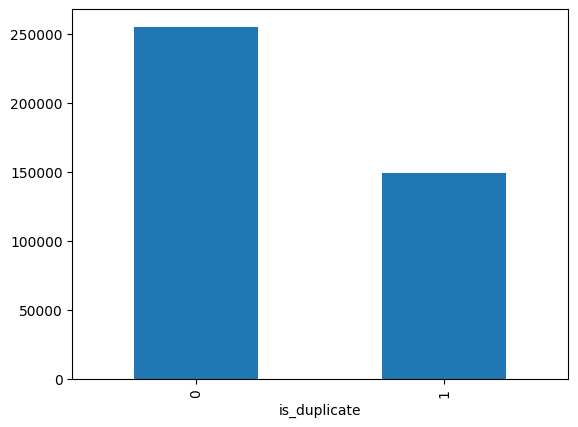

In [116]:
data['is_duplicate'].value_counts().plot(kind='bar')

In [117]:
print(data['qid1'].duplicated().value_counts())
print(data['qid2'].duplicated().value_counts())

qid1
False    290654
True     113636
Name: count, dtype: int64
qid2
False    299364
True     104926
Name: count, dtype: int64


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [119]:
#Repeted questions
qid = pd.Series(qid.tolist() + data['qid2'].tolist())
print('No of unique questions : ', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('No of repeted questions : ', x[x].shape[0])

No of unique questions :  537933
No of repeted questions :  333110


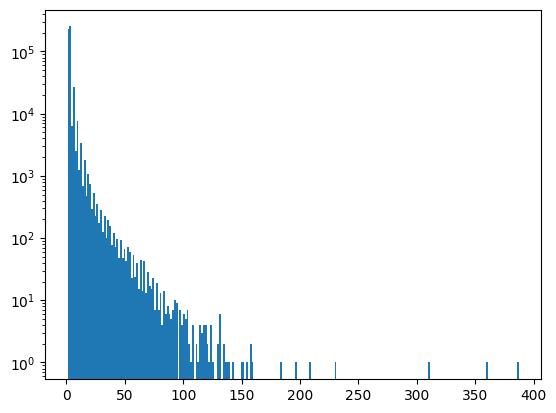

In [120]:
#Repeted questions histograms
plt.hist(qid.value_counts().values, bins=250)
plt.yscale('log')
plt.show()

In [121]:
#New df to work on
new_df = data.sample(30000, random_state=2)
new_df = new_df[['question1', 'question2', 'is_duplicate']]

In [122]:
new_df.shape

(30000, 3)

In [123]:
new_df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [124]:
new_df.dropna(inplace=True)

In [125]:
new_df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

Feature extraction

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

#merge ques
questions = list(new_df['question1']) + list(new_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr  = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [127]:
temp_df = pd.concat([pd.DataFrame(q1_arr, index=new_df.index), pd.DataFrame(q2_arr, index=new_df.index)], axis=1)

In [128]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [129]:
temp_df.shape

(30000, 6001)

Training

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=12, shuffle=False)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7335